# détecter les attaques pour tous les types d'attaque  

In [1]:
import re
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
# obtenir la longueur de lien(information)
def get_len(info_comp):
    return len(info_comp)

# obtenir des symboles spécials pour logs sql
def get_sql_char(info_comp):
    return len(re.findall("[?=\*#@%>]", info_comp, re.IGNORECASE))

# obtenir des mots spécials pour logs sql
def get_sql_word(info_comp):
    return len(re.findall("(SELECT)|(version)|(comment)|(user)|(FROM)|(mysql)|(host)|(DELET)|(name)|(MYSQL)|(WHERE)|(password)|(ORDER)",info_comp,re.IGNORECASE))

# obtenir des symboles spécials pour logs xss
def get_xss_char(info_comp):
    return len(re.findall("[<>\"\'=&{}!#\*]", info_comp, re.IGNORECASE))

# obtenir des mots spécials pour logs xss
def get_xss_word(info_comp):
    return len(re.findall("(alert)|(script)|(XSS)|(SRC=)|(xss)|(onerror)|(onload)|(BODY)|(src=)|(INPUT)|(http)|(LINK)|(url=)|(SCRIPT)",info_comp,re.IGNORECASE))


def get_feature(info_comp):
    return [get_len(info_comp),get_evil_char(info_comp),get_evil_word(info_comp)]


# import data

## normal:12000  brut force:12000  sql:236  xss:452

In [2]:
import pandas as pd 
import numpy as np 
from pandas import Series,DataFrame
bf_logs = pd.read_csv("./data/bf.csv")
normal_logs=pd.read_csv("./data/normal.csv")
sql_logs=pd.read_csv("./data/sql.csv")
xss_logs=pd.read_csv("./data/xss.csv")

In [3]:
bf_logs.label=1
sql_logs.label=2
xss_logs.label=3
xss_logs

,Unnamed: 0,ip_address,date,hour,minute,seconds,protocol,username,password,status,respsize,timed,label
0,0,192.108.116.88,18/Dec/2017,13,0,31,GET,datalab,"';alert(String.fromCharCode(88,83,83))//';aler...",200,1040,183,3
1,1,192.108.116.88,18/Dec/2017,13,0,31,GET,datalab,"';alert(String.fromCharCode(88,83,83))//';aler...",200,945,35,3
2,2,192.108.116.88,18/Dec/2017,13,0,31,GET,datalab,"';alert(String.fromCharCode(88,83,83))//';aler...",200,34463,8,3
3,3,192.108.116.88,18/Dec/2017,13,2,31,POST,datalab,"';alert(String.fromCharCode(88,83,83))//';aler...",-,-,-,3
4,4,192.108.116.88,18/Dec/2017,13,4,31,POST,datalab,"';alert(String.fromCharCode(88,83,83))//';aler...",-,-,-,3
5,5,192.108.116.88,18/Dec/2017,13,4,56,GET,datalab,'';!--<XSS>=&{()},200,1040,19,3
6,6,192.108.116.88,18/Dec/2017,13,4,56,GET,datalab,'';!--<XSS>=&{()},200,945,24,3
7,7,192.108.116.88,18/Dec/2017,13,4,56,GET,datalab,'';!--<XSS>=&{()},200,34463,2,3
8,8,192.108.116.88,18/Dec/2017,13,4,57,POST,datalab,'';!--<XSS>=&{()},200,1073,206,3
9,9,192.108.116.88,18/Dec/2017,13,4,57,GET,datalab,'';!--<XSS>=&{()},304,-,5,3


In [4]:
frames=[normal_logs,sql_logs,xss_logs]
data_logs=pd.concat(frames)

# ajouter nouveau feature
### ajouter des features longueur, des symboles spécials et des mots spécials pour des logs

In [5]:
f=lambda x: str(x)
data_logs['len']=data_logs['password'].apply(f).apply(get_len)
data_logs['sqlchar']=data_logs['password'].apply(f).apply(get_sql_char)
data_logs['sqlword']=data_logs['password'].apply(f).apply(get_sql_word)
data_logs['xsschar']=data_logs['password'].apply(f).apply(get_xss_char)
data_logs['xssword']=data_logs['password'].apply(f).apply(get_xss_word)
data_logs

,Unnamed: 0,ip_address,date,hour,minute,seconds,protocol,username,password,status,respsize,timed,label,len,sqlchar,sqlword,xsschar,xssword
0,0,76.121.199.123,21/Jan/2018,23,59,0,GET,12345678,michael,200,1040,20,0,7,0,0,0,0
1,1,76.121.199.123,21/Jan/2018,23,59,1,GET,12345678,michael,200,945,22,0,7,0,0,0,0
2,2,76.121.199.123,21/Jan/2018,23,59,4,GET,12345678,michael,200,34463,2435,0,7,0,0,0,0
3,3,76.121.199.123,21/Jan/2018,23,59,6,POST,12345678,michael,200,1073,1852,0,7,0,0,0,0
4,4,76.121.199.123,21/Jan/2018,23,59,7,GET,12345678,michael,304,-,2,0,7,0,0,0,0
5,5,76.121.199.123,21/Jan/2018,23,59,7,GET,12345678,michael,304,-,6,0,7,0,0,0,0
6,6,114.67.130.218,21/Jan/2018,23,59,12,GET,personal,klaster,200,1040,1,0,7,0,0,0,0
7,7,114.67.130.218,21/Jan/2018,23,59,12,GET,personal,klaster,200,945,1,0,7,0,0,0,0
8,8,114.67.130.218,21/Jan/2018,23,59,12,GET,personal,klaster,200,34463,3,0,7,0,0,0,0
9,9,114.67.130.218,21/Jan/2018,23,59,13,POST,personal,klaster,200,1073,134,0,7,0,0,0,0


In [6]:
bf_logs['len']=bf_logs['password'].apply(f).apply(get_len)
bf_logs['sqlchar']=bf_logs['password'].apply(f).apply(get_sql_char)
bf_logs['sqlword']=bf_logs['password'].apply(f).apply(get_sql_word)
bf_logs['xsschar']=bf_logs['password'].apply(f).apply(get_xss_char)
bf_logs['xssword']=bf_logs['password'].apply(f).apply(get_xss_word)
bf_logs

,Unnamed: 0,ip_address,date,hour,minute,seconds,protocol,username,password,status,respsize,timed,label,len,sqlchar,sqlword,xsschar,xssword
0,0,136.133.92.208,22/Jan/2018,15,2,1,GET,director,123456,200,1040,312,1,6,0,0,0,0
1,1,136.133.92.208,22/Jan/2018,15,2,1,GET,director,123456,200,945,14,1,6,0,0,0,0
2,2,136.133.92.208,22/Jan/2018,15,2,2,GET,director,123456,200,34463,9,1,6,0,0,0,0
3,3,30.142.97.121,22/Jan/2018,15,2,3,GET,administrator,123456,200,1040,2,1,6,0,0,0,0
4,4,30.142.97.121,22/Jan/2018,15,2,4,GET,administrator,123456,200,945,9,1,6,0,0,0,0
5,5,30.142.97.121,22/Jan/2018,15,2,4,GET,administrator,123456,200,34463,7,1,6,0,0,0,0
6,6,136.133.92.208,22/Jan/2018,15,2,6,POST,director,123456,200,1073,2547,1,6,0,0,0,0
7,7,136.133.92.208,22/Jan/2018,15,2,6,GET,director,123456,304,-,2,1,6,0,0,0,0
8,8,136.133.92.208,22/Jan/2018,15,2,7,GET,director,123456,304,-,9,1,6,0,0,0,0
9,9,30.142.97.121,22/Jan/2018,15,2,7,POST,administrator,123456,200,1073,1583,1,6,0,0,0,0


# transformer la forme de l'adresse ip

In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data_logs['ip_address'] = le.fit_transform(data_logs['ip_address'].apply(f)) 
data_logs

,Unnamed: 0,ip_address,date,hour,minute,seconds,protocol,username,password,status,respsize,timed,label,len,sqlchar,sqlword,xsschar,xssword
0,0,1796,21/Jan/2018,23,59,0,GET,12345678,michael,200,1040,20,0,7,0,0,0,0
1,1,1796,21/Jan/2018,23,59,1,GET,12345678,michael,200,945,22,0,7,0,0,0,0
2,2,1796,21/Jan/2018,23,59,4,GET,12345678,michael,200,34463,2435,0,7,0,0,0,0
3,3,1796,21/Jan/2018,23,59,6,POST,12345678,michael,200,1073,1852,0,7,0,0,0,0
4,4,1796,21/Jan/2018,23,59,7,GET,12345678,michael,304,-,2,0,7,0,0,0,0
5,5,1796,21/Jan/2018,23,59,7,GET,12345678,michael,304,-,6,0,7,0,0,0,0
6,6,144,21/Jan/2018,23,59,12,GET,personal,klaster,200,1040,1,0,7,0,0,0,0
7,7,144,21/Jan/2018,23,59,12,GET,personal,klaster,200,945,1,0,7,0,0,0,0
8,8,144,21/Jan/2018,23,59,12,GET,personal,klaster,200,34463,3,0,7,0,0,0,0
9,9,144,21/Jan/2018,23,59,13,POST,personal,klaster,200,1073,134,0,7,0,0,0,0


In [8]:
bf_logs['ip_address'] = le.fit_transform(bf_logs['ip_address'].apply(f)) 
bf_logs

,Unnamed: 0,ip_address,date,hour,minute,seconds,protocol,username,password,status,respsize,timed,label,len,sqlchar,sqlword,xsschar,xssword
0,0,3,22/Jan/2018,15,2,1,GET,director,123456,200,1040,312,1,6,0,0,0,0
1,1,3,22/Jan/2018,15,2,1,GET,director,123456,200,945,14,1,6,0,0,0,0
2,2,3,22/Jan/2018,15,2,2,GET,director,123456,200,34463,9,1,6,0,0,0,0
3,3,11,22/Jan/2018,15,2,3,GET,administrator,123456,200,1040,2,1,6,0,0,0,0
4,4,11,22/Jan/2018,15,2,4,GET,administrator,123456,200,945,9,1,6,0,0,0,0
5,5,11,22/Jan/2018,15,2,4,GET,administrator,123456,200,34463,7,1,6,0,0,0,0
6,6,3,22/Jan/2018,15,2,6,POST,director,123456,200,1073,2547,1,6,0,0,0,0
7,7,3,22/Jan/2018,15,2,6,GET,director,123456,304,-,2,1,6,0,0,0,0
8,8,3,22/Jan/2018,15,2,7,GET,director,123456,304,-,9,1,6,0,0,0,0
9,9,11,22/Jan/2018,15,2,7,POST,administrator,123456,200,1073,1583,1,6,0,0,0,0


In [9]:
del data_logs[data_logs.columns[0]]

In [10]:
del bf_logs[bf_logs.columns[0]]

# arrange feature
### remplacer des données null au 0

In [11]:
def replace(resp):
    if resp == '-':
        resp=0
    elif (resp==resp)==False:
        resp=0
    return (resp)
data_logs['respsize']=data_logs['respsize'].apply(replace)
data_logs['timed']=data_logs['timed'].apply(replace)
data_logs['status']=data_logs['status'].apply(replace)

In [12]:
bf_logs['respsize']=bf_logs['respsize'].apply(replace)
bf_logs['timed']=bf_logs['timed'].apply(replace)
bf_logs['status']=bf_logs['status'].apply(replace)

# la visualisation de la performance

In [13]:
from sklearn import metrics
def do_metrics(y_test,y_pred):
    print ("metrics.confusion_matrix:")
    print (metrics.confusion_matrix(y_test, y_pred))
    print ("metrics.accuracy_score:")
    print (metrics.accuracy_score(y_test, y_pred))
    print ("metrics.precision_score:")
    print (metrics.precision_score(y_test, y_pred))
    print ("metrics.recall_score:")
    print (metrics.recall_score(y_test, y_pred))
    print ("metrics.f1_score:")
    print (metrics.f1_score(y_test,y_pred))

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
def plot_cm(cm, labels):
    
    # Compute percentanges
    percent = (cm*100.0)/np.array(np.matrix(cm.sum(axis=1)).T)  # Derp, I'm sure there's a better way
    
    print ('Confusion Matrix Stats')
    for i, label_i in enumerate(labels):
        for j, label_j in enumerate(labels):
            print ("%s/%s: %.2f%% (%d/%d)" % (label_i, label_j, (percent[i][j]), cm[i][j], cm[i].sum()))

    # Show confusion matrix
    # Thanks kermit666 from stackoverflow :)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.grid(b=False)
    cax = ax.matshow(percent, cmap='Greens')
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
def plot_roc(model,y_test,y_pred):
    # Compute ROC curve and ROC area for each class  
    fpr,tpr,threshold = roc_curve(y_test, y_pred) ###True positive和false positive  
    roc_auc = auc(fpr,tpr) ###auc 

    plt.figure()  
    lw = 2  
    plt.figure(figsize=(5,5))  
    plt.plot(fpr, tpr, color='darkorange',  
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) 
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')  
    plt.xlim([0.0, 1.0])  
    plt.ylim([0.0, 1.05])  
    plt.xlabel('False Positive Rate')  
    plt.ylabel('True Positive Rate')  
    plt.title('Receiver operating characteristic example')  
    plt.legend(loc="lower right")  
    plt.show()  

# utiliser des features sans l'adresse ip

In [15]:
data_logs.reset_index(drop=True, inplace=True)
data_logs

,ip_address,date,hour,minute,seconds,protocol,username,password,status,respsize,timed,label,len,sqlchar,sqlword,xsschar,xssword
0,1796,21/Jan/2018,23,59,0,GET,12345678,michael,200,1040,20,0,7,0,0,0,0
1,1796,21/Jan/2018,23,59,1,GET,12345678,michael,200,945,22,0,7,0,0,0,0
2,1796,21/Jan/2018,23,59,4,GET,12345678,michael,200,34463,2435,0,7,0,0,0,0
3,1796,21/Jan/2018,23,59,6,POST,12345678,michael,200,1073,1852,0,7,0,0,0,0
4,1796,21/Jan/2018,23,59,7,GET,12345678,michael,304,0,2,0,7,0,0,0,0
5,1796,21/Jan/2018,23,59,7,GET,12345678,michael,304,0,6,0,7,0,0,0,0
6,144,21/Jan/2018,23,59,12,GET,personal,klaster,200,1040,1,0,7,0,0,0,0
7,144,21/Jan/2018,23,59,12,GET,personal,klaster,200,945,1,0,7,0,0,0,0
8,144,21/Jan/2018,23,59,12,GET,personal,klaster,200,34463,3,0,7,0,0,0,0
9,144,21/Jan/2018,23,59,13,POST,personal,klaster,200,1073,134,0,7,0,0,0,0


In [16]:
features = list(data_logs.columns[[0,8,9,10,12,13,14,15,16]])
X_1 = data_logs[features]
X_1

,ip_address,status,respsize,timed,len,sqlchar,sqlword,xsschar,xssword
0,1796,200,1040,20,7,0,0,0,0
1,1796,200,945,22,7,0,0,0,0
2,1796,200,34463,2435,7,0,0,0,0
3,1796,200,1073,1852,7,0,0,0,0
4,1796,304,0,2,7,0,0,0,0
5,1796,304,0,6,7,0,0,0,0
6,144,200,1040,1,7,0,0,0,0
7,144,200,945,1,7,0,0,0,0
8,144,200,34463,3,7,0,0,0,0
9,144,200,1073,134,7,0,0,0,0


In [17]:
features = list(bf_logs.columns[[0,8,9,10,12,13,14,15,16]])
X_2 = bf_logs[features]
X_2

,ip_address,status,respsize,timed,len,sqlchar,sqlword,xsschar,xssword
0,3,200,1040,312,6,0,0,0,0
1,3,200,945,14,6,0,0,0,0
2,3,200,34463,9,6,0,0,0,0
3,11,200,1040,2,6,0,0,0,0
4,11,200,945,9,6,0,0,0,0
5,11,200,34463,7,6,0,0,0,0
6,3,200,1073,2547,6,0,0,0,0
7,3,304,0,2,6,0,0,0,0
8,3,304,0,9,6,0,0,0,0
9,11,200,1073,1583,6,0,0,0,0


In [18]:
def transint(x):
    x=int(x)
    return(x)
X_1['status']=X_1['status'].apply(transint)
X_1['respsize']=X_1['respsize'].apply(transint)
X_1['timed']=X_1['timed'].apply(transint)

C:\Users\18791\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\18791\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\18791\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-

In [19]:
X_2['status']=X_2['status'].apply(transint)
X_2['respsize']=X_2['respsize'].apply(transint)
X_2['timed']=X_2['timed'].apply(transint)

C:\Users\18791\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\18791\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\18791\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

# tirer des labels "1" pour logs d'attaque, "0" pour logs de non attaque

In [20]:
y_1=data_logs['label']
y_1=y_1.apply(transint)
y_1

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
12658    3
12659    3
12660    3
12661    3
12662    3
12663    3
12664    3
12665    3
12666    3
12667    3
12668    3
12669    3
12670    3
12671    3
12672    3
12673    3
12674    3
12675    3
12676    3
12677    3
12678    3
12679    3
12680    3
12681    3
12682    3
12683    3
12684    3
12685    3
12686    3
12687    3
Name: label, dtype: int64

In [21]:
y_2=bf_logs['label']
y_2=y_2.apply(transint)
y_2

0         1
1         1
2         1
3         1
4         1
5         1
6         1
7         1
8         1
9         1
10        1
11        1
12        1
13        1
14        1
15        1
16        1
17        1
18        1
19        1
20        1
21        1
22        1
23        1
24        1
25        1
26        1
27        1
28        1
29        1
         ..
128029    1
128030    1
128031    1
128032    1
128033    1
128034    1
128035    1
128036    1
128037    1
128038    1
128039    1
128040    1
128041    1
128042    1
128043    1
128044    1
128045    1
128046    1
128047    1
128048    1
128049    1
128050    1
128051    1
128052    1
128053    1
128054    1
128055    1
128056    1
128057    1
128058    1
Name: label, dtype: int64

# separer des données aux train set(70%) et test set(30%) 
#### pour attaque par brute force train set(92%) et test set(8%)

In [22]:
from sklearn import cross_validation
X_train1, X_test1, y_train1, y_test1 = cross_validation.train_test_split(X_1, y_1, test_size=0.3, random_state=0)

C:\Users\18791\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:
X_train2, X_test2, y_train2, y_test2 = cross_validation.train_test_split(X_2, y_2, test_size=0.92, random_state=0)

In [24]:
X_train=pd.concat([X_train1,X_train2])
X_test=pd.concat([X_test1,X_test2])
y_train=pd.concat([y_train1,y_train2])
y_test=pd.concat([y_test1,y_test2])

In [25]:
def tanslateto1(x):
    if x==2 or x==3:
        x=1
    return(x)

In [26]:
y_train=y_train.apply(tanslateto1)
y_test=y_test.apply(tanslateto1)

In [27]:
list_ip_train=np.array(X_train['ip_address']).tolist()
def count_ip_train(x):
    ipcount=list_ip_train.count(x)
    return(ipcount)
X_train['ipcount']=X_train['ip_address'].apply(count_ip_train)

In [28]:
list_ip_test=np.array(X_test['ip_address']).tolist()
def count_ip_test(x):
    ipcount=list_ip_test.count(x)
    return(ipcount)
X_test['ipcount']=X_test['ip_address'].apply(count_ip_test)

In [29]:
X_test

,ip_address,status,respsize,timed,len,sqlchar,sqlword,xsschar,xssword,ipcount
9056,982,200,34463,0,6,0,0,0,0,3
8827,1710,200,945,1,6,0,0,0,0,2
9271,1856,200,945,0,6,0,0,0,0,2
10012,154,304,0,0,6,0,0,0,0,3
7933,675,200,945,2,6,0,0,0,0,2
8118,1444,200,1040,1,7,0,0,0,0,3
6909,31,200,1073,495,6,0,0,0,0,3
6132,970,200,1040,1,6,0,0,0,0,3
5585,1169,304,0,1,7,0,0,0,0,3
7081,1875,200,945,1,6,0,0,0,0,5


In [30]:
X_train

,ip_address,status,respsize,timed,len,sqlchar,sqlword,xsschar,xssword,ipcount
1398,443,200,1040,1,4,0,0,0,0,3
1203,1050,200,1073,1046,6,0,0,0,0,4
7852,1225,304,0,1,6,0,0,0,0,3
6807,204,200,1073,4469,6,0,0,0,0,5
6635,1102,304,0,1,6,0,0,0,0,6
4981,68,200,945,1,9,0,0,0,0,6
6966,35,200,1040,0,6,0,0,0,0,5
6290,1373,200,34463,0,6,0,0,0,0,3
2533,877,200,945,1,6,0,0,0,0,4
4581,761,200,1073,392,6,0,0,0,0,3


In [31]:
del X_train['ip_address']
del X_train['timed']

In [32]:
del X_test['ip_address']
del X_test['timed']

In [33]:
del X_train['respsize']
del X_test['respsize']

In [34]:
X_train

,status,len,sqlchar,sqlword,xsschar,xssword,ipcount
1398,200,4,0,0,0,0,3
1203,200,6,0,0,0,0,4
7852,304,6,0,0,0,0,3
6807,200,6,0,0,0,0,5
6635,304,6,0,0,0,0,6
4981,200,9,0,0,0,0,6
6966,200,6,0,0,0,0,5
6290,200,6,0,0,0,0,3
2533,200,6,0,0,0,0,4
4581,200,6,0,0,0,0,3


In [35]:
'''
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
y_pred = clf.predict(X_test)
do_metrics(y_test, y_pred)
labels = ['no attaque', 'attaque']
cm = metrics.confusion_matrix(y_test, y_pred)
plot_cm(cm, labels)
'''

"\nfrom sklearn import svm\nclf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)\ny_pred = clf.predict(X_test)\ndo_metrics(y_test, y_pred)\nlabels = ['no attaque', 'attaque']\ncm = metrics.confusion_matrix(y_test, y_pred)\nplot_cm(cm, labels)\n"

In [36]:
x_test = X_test[list(X_test.columns[[0,1,2,3,4,5]])]
x_train = X_train[list(X_test.columns[[0,1,2,3,4,5]])]

# algorithme l'arbre de décision 

metrics.confusion_matrix:
[[  3585     28]
 [   194 117815]]
metrics.accuracy_score:
0.998174672345
metrics.precision_score:
0.99976239573
metrics.recall_score:
0.998356057589
metrics.f1_score:
0.999058731747
Confusion Matrix Stats
no attaque/no attaque: 99.23% (3585/3613)
no attaque/attaque: 0.77% (28/3613)
attaque/no attaque: 0.16% (194/118009)
attaque/attaque: 99.84% (117815/118009)


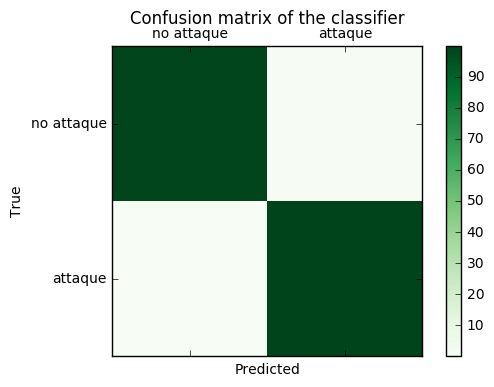

In [73]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
# training
clf = clf.fit(X_train, y_train)
# classification
y_pred = clf.predict(X_test)
# confusion matrix
do_metrics(y_test,y_pred)
labels = ['no attaque', 'attaque']
cm = metrics.confusion_matrix(y_test, y_pred)
plot_cm(cm, labels)
# performance

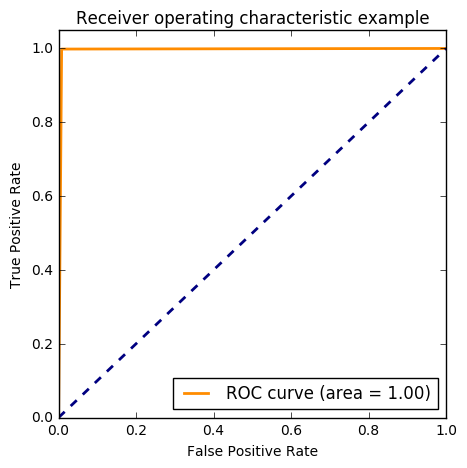

In [76]:
plot_roc(clf,y_test,y_pred)

# la visualisation de l'arbre de décision 

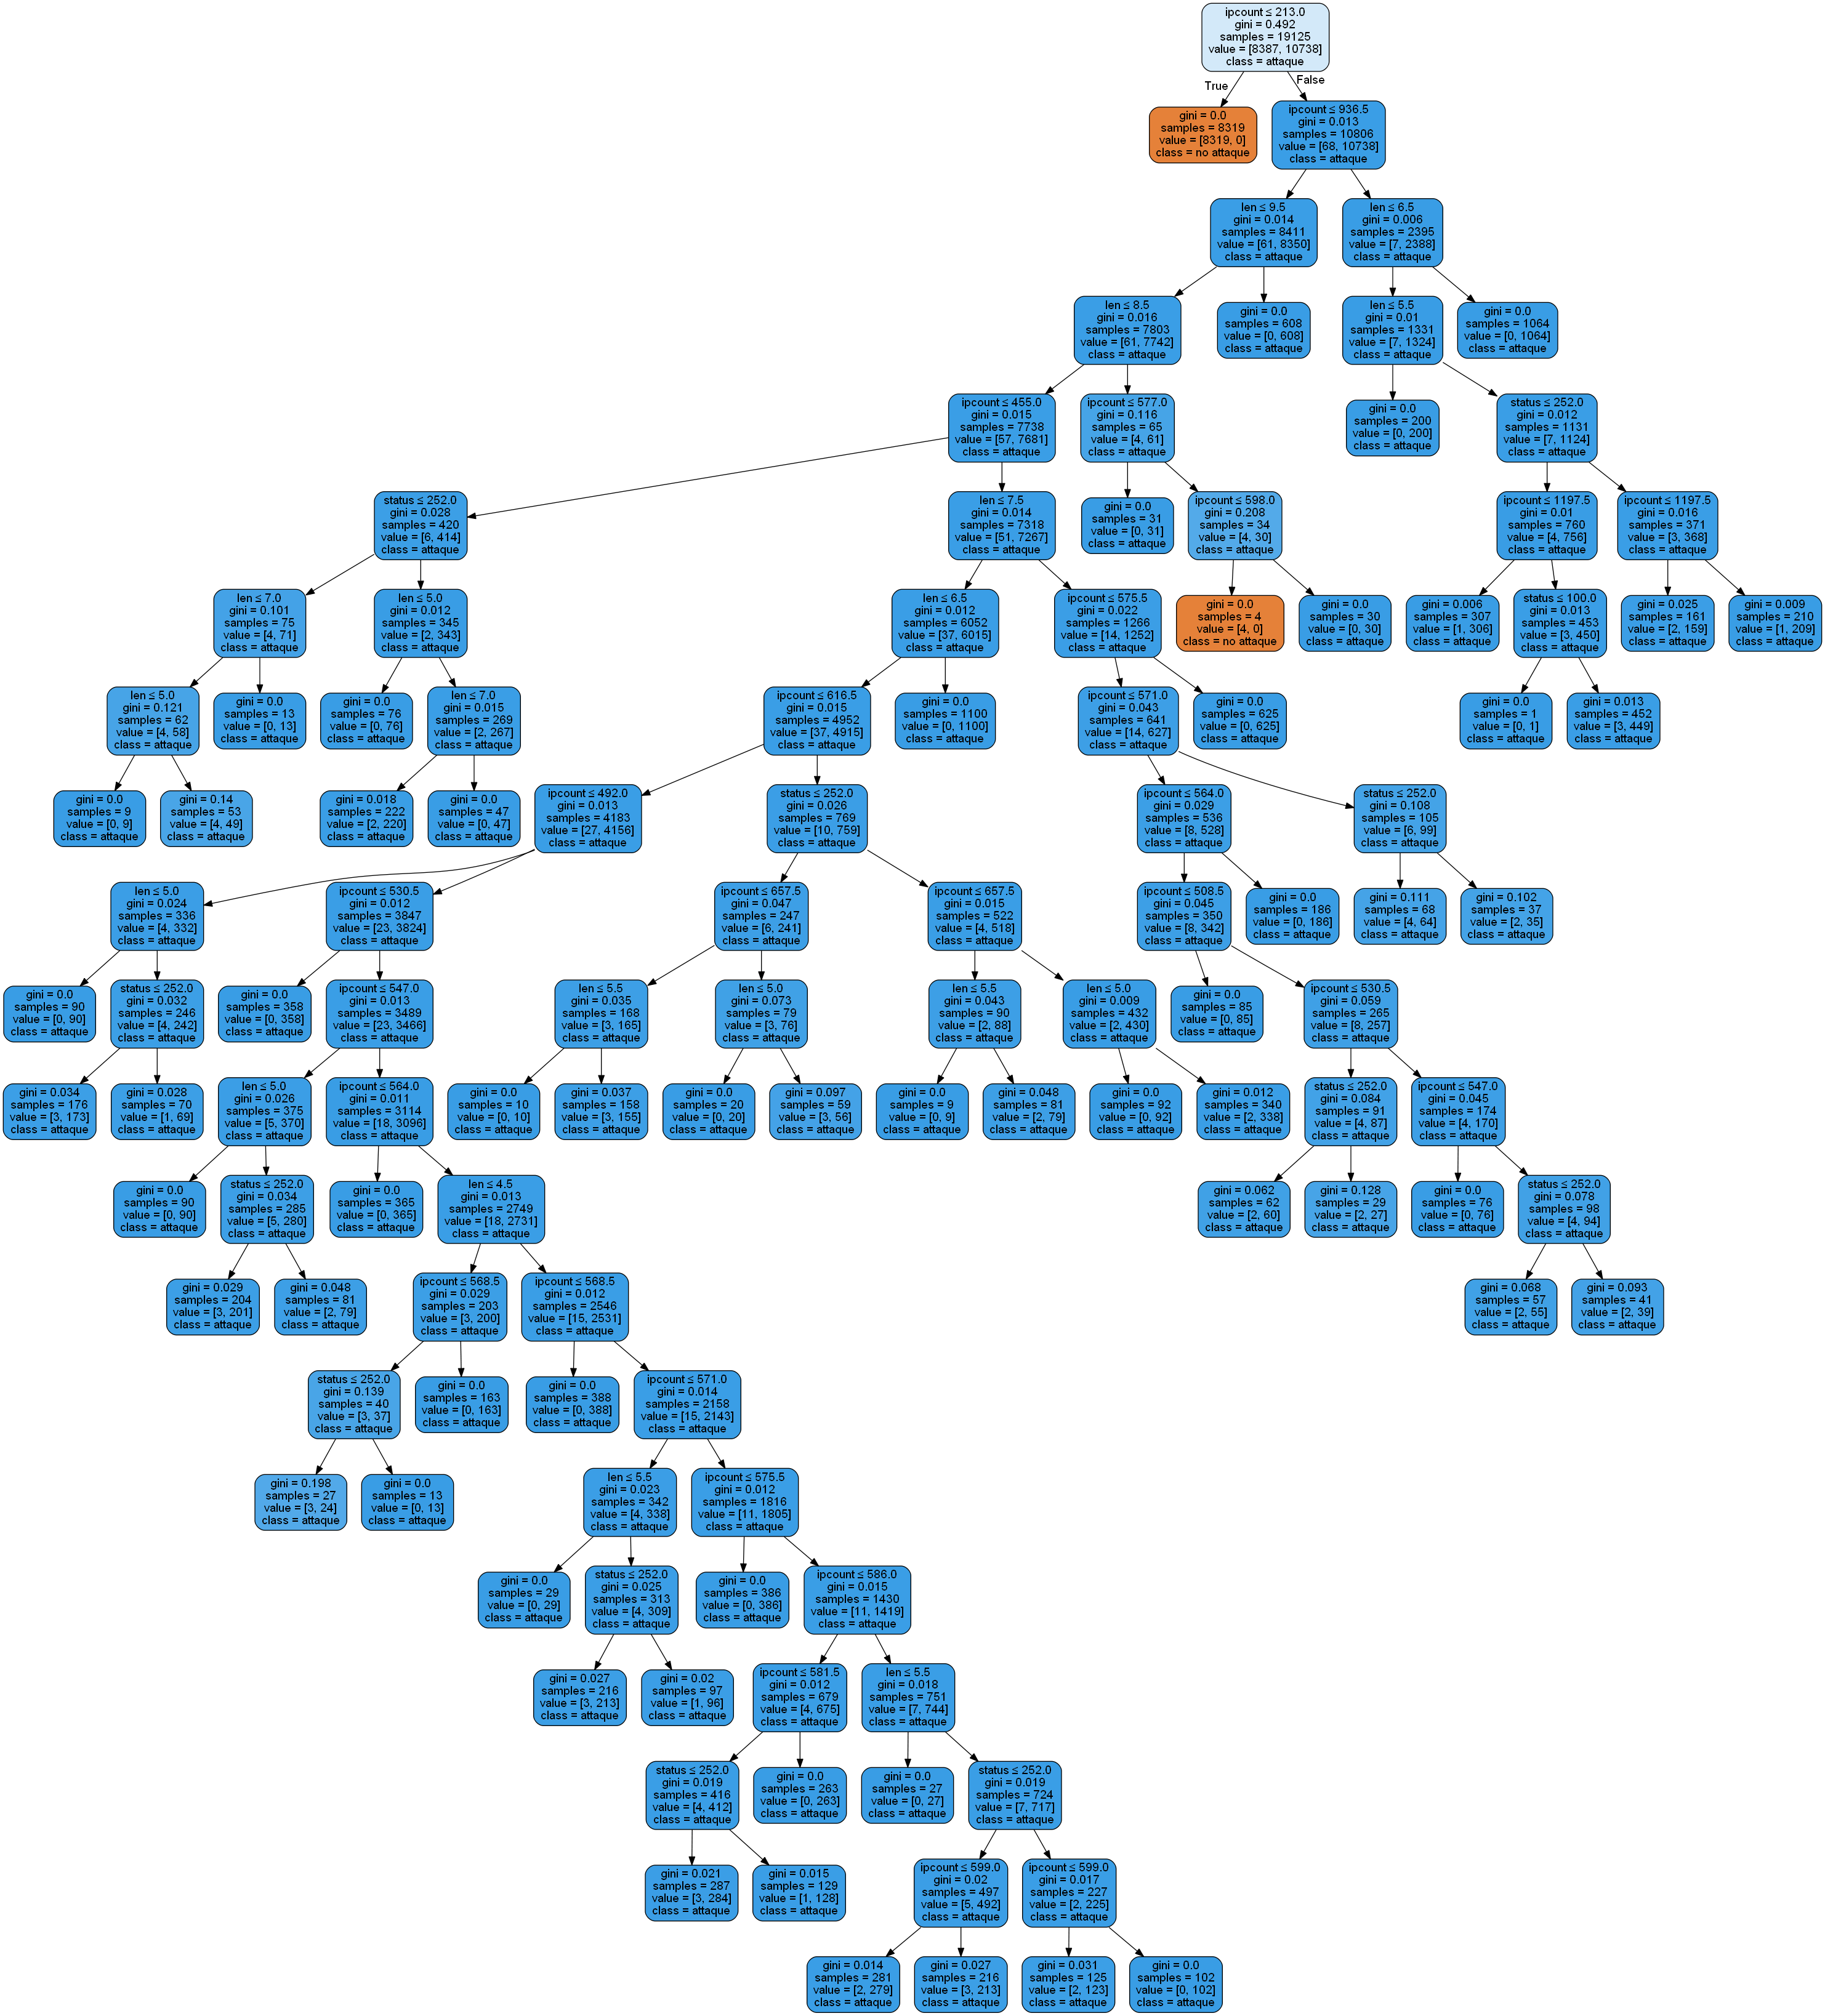

In [37]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
import graphviz
import pydotplus
from IPython.display import Image  
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=X_train.columns,  
                         class_names=['no attaque', 'attaque'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [38]:
graph.write_pdf("tree.pdf")

True

# algorithme logistique régression 

metrics.confusion_matrix:
[[  3585     28]
 [   175 117834]]
metrics.accuracy_score:
0.998330894082
metrics.precision_score:
0.999762434033
metrics.recall_score:
0.998517062258
metrics.f1_score:
0.999139360074
Confusion Matrix Stats
no attaque/no attaque: 99.23% (3585/3613)
no attaque/attaque: 0.77% (28/3613)
attaque/no attaque: 0.15% (175/118009)
attaque/attaque: 99.85% (117834/118009)


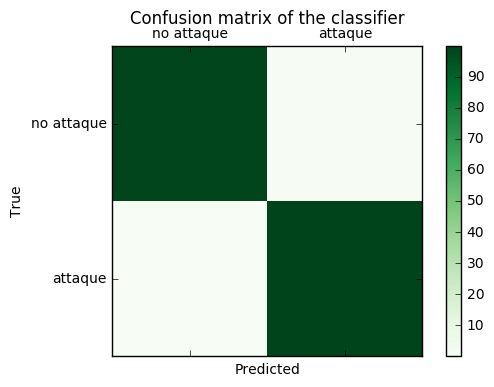

In [39]:
from sklearn.linear_model import LogisticRegression
# classifier
clf_log = LogisticRegression()
# training
clf_log = clf_log.fit(X_train, y_train)
# classification
y_pred = clf_log.predict(X_test)
# confusion matrix
labels = ['no attaque', 'attaque']
do_metrics(y_test,y_pred)
cm = metrics.confusion_matrix(y_test, y_pred)
plot_cm(cm, labels)

# algorithme de random forest

metrics.confusion_matrix:
[[  3585     28]
 [    30 117979]]
metrics.accuracy_score:
0.999523112595
metrics.precision_score:
0.99976272594
metrics.recall_score:
0.999745782101
metrics.f1_score:
0.999754253949
Confusion Matrix Stats
no attaque/no attaque: 99.23% (3585/3613)
no attaque/attaque: 0.77% (28/3613)
attaque/no attaque: 0.03% (30/118009)
attaque/attaque: 99.97% (117979/118009)


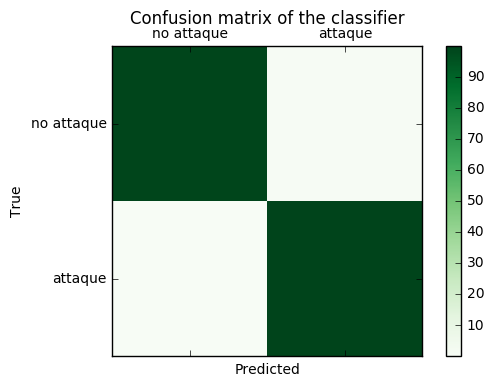

In [60]:
from sklearn.ensemble import RandomForestClassifier
# classifier
clf_rf = RandomForestClassifier()
# training
clf_rf = clf_rf.fit(X_train, y_train)
# classification
y_pred = clf_rf.predict(X_test)
# confusion matrix
do_metrics(y_test,y_pred)
labels = ['no attaque', 'attaque']
cm = metrics.confusion_matrix(y_test, y_pred)
plot_cm(cm, labels)

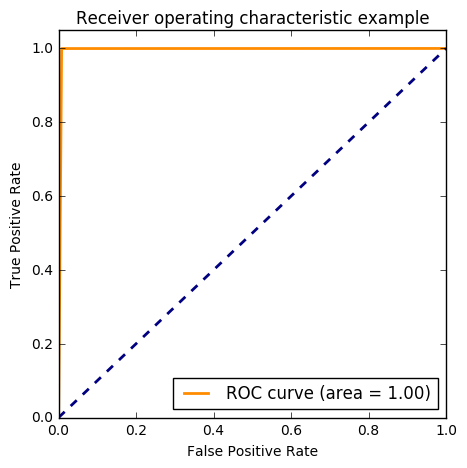

In [61]:
plot_roc(clf_rf,y_test,y_pred)

# algorithme Adaboost

metrics.confusion_matrix:
[[  3585     28]
 [   194 117815]]
metrics.accuracy_score:
0.998174672345
metrics.precision_score:
0.99976239573
metrics.recall_score:
0.998356057589
metrics.f1_score:
0.999058731747
Confusion Matrix Stats
no attaque/no attaque: 99.23% (3585/3613)
no attaque/attaque: 0.77% (28/3613)
attaque/no attaque: 0.16% (194/118009)
attaque/attaque: 99.84% (117815/118009)


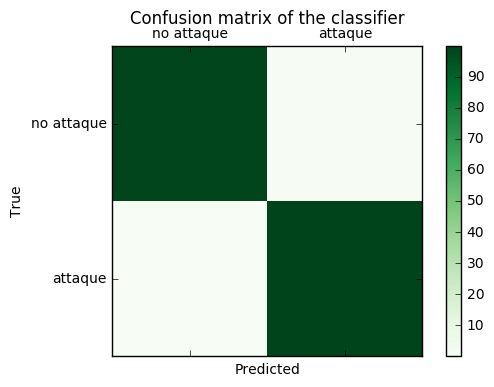

In [41]:
from sklearn.ensemble import AdaBoostClassifier
# classifier
clf_ada = AdaBoostClassifier(n_estimators=100)
# training
clf_ada = clf_ada.fit(X_train, y_train)
# classification
y_pred = clf_ada.predict(X_test)
# performance
do_metrics(y_test,y_pred)
# confusion matrix
labels = ['no attaque', 'attaque']
cm = metrics.confusion_matrix(y_test, y_pred)
plot_cm(cm, labels)

# algorithme XGBoost

metrics.confusion_matrix:
[[  3585     28]
 [   194 117815]]
metrics.accuracy_score:
0.998174672345
metrics.precision_score:
0.99976239573
metrics.recall_score:
0.998356057589
metrics.f1_score:
0.999058731747
Confusion Matrix Stats
no attaque/no attaque: 99.23% (3585/3613)
no attaque/attaque: 0.77% (28/3613)
attaque/no attaque: 0.16% (194/118009)
attaque/attaque: 99.84% (117815/118009)


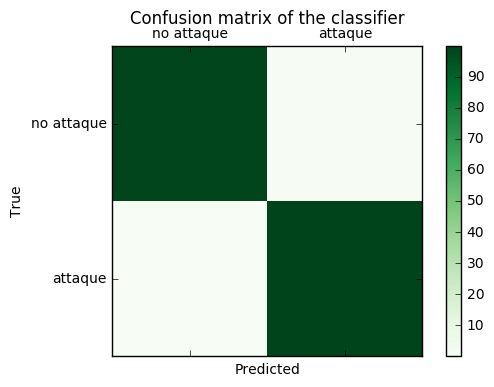

In [42]:
from xgboost.sklearn import XGBClassifier
model = XGBClassifier(max_depth=6, learning_rate=0.03, n_estimators=200, silent=True, objective='binary:logistic')
model.fit(X_train, y_train)
ans = model.predict(X_test)
do_metrics(y_test, ans)
labels = ['no attaque', 'attaque']
cm = metrics.confusion_matrix(y_test, ans)
plot_cm(cm, labels)

## régler les paramètres pour RandomForest

### n_estimators range(10,201,20)

In [63]:
from sklearn.grid_search import GridSearchCV
param_test1 = {'n_estimators':list(range(10,201,20))}
gsearch1 = GridSearchCV(estimator = RandomForestClassifier(), 
                       param_grid = param_test1, scoring='roc_auc',cv=5)
gsearch1.fit(X_train, y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.99808, std: 0.00060, params: {'n_estimators': 10},
  mean: 0.99809, std: 0.00059, params: {'n_estimators': 30},
  mean: 0.99809, std: 0.00060, params: {'n_estimators': 50},
  mean: 0.99808, std: 0.00062, params: {'n_estimators': 70},
  mean: 0.99806, std: 0.00063, params: {'n_estimators': 90},
  mean: 0.99808, std: 0.00059, params: {'n_estimators': 110},
  mean: 0.99808, std: 0.00060, params: {'n_estimators': 130},
  mean: 0.99809, std: 0.00061, params: {'n_estimators': 150},
  mean: 0.99809, std: 0.00062, params: {'n_estimators': 170},
  mean: 0.99808, std: 0.00064, params: {'n_estimators': 190}],
 {'n_estimators': 170},
 0.9980948238549073)

### 'max_depth'  'min_samples_split'

In [53]:
param_test2 = {'max_depth':list(range(3,20,2)), 'min_samples_split':list(range(2,100,10))}
gsearch2 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 50),
   param_grid = param_test2, scoring='roc_auc',iid=False, cv=5)
gsearch2.fit(X_train, y_train)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.99581, std: 0.00126, params: {'max_depth': 3, 'min_samples_split': 2},
  mean: 0.99619, std: 0.00134, params: {'max_depth': 3, 'min_samples_split': 12},
  mean: 0.99598, std: 0.00144, params: {'max_depth': 3, 'min_samples_split': 22},
  mean: 0.99610, std: 0.00126, params: {'max_depth': 3, 'min_samples_split': 32},
  mean: 0.99588, std: 0.00105, params: {'max_depth': 3, 'min_samples_split': 42},
  mean: 0.99593, std: 0.00117, params: {'max_depth': 3, 'min_samples_split': 52},
  mean: 0.99608, std: 0.00123, params: {'max_depth': 3, 'min_samples_split': 62},
  mean: 0.99623, std: 0.00131, params: {'max_depth': 3, 'min_samples_split': 72},
  mean: 0.99594, std: 0.00123, params: {'max_depth': 3, 'min_samples_split': 82},
  mean: 0.99609, std: 0.00123, params: {'max_depth': 3, 'min_samples_split': 92},
  mean: 0.99645, std: 0.00130, params: {'max_depth': 5, 'min_samples_split': 2},
  mean: 0.99629, std: 0.00141, params: {'max_depth': 5, 'min_samples_split': 12},
  mean: 0.99632, s

In [57]:
param_test3 = {'min_samples_split':list(range(2,100,20)), 'min_samples_leaf':list(range(1,60,10))}
gsearch3 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 50, max_depth=15),
   param_grid = param_test3, scoring='roc_auc',iid=False, cv=5)
gsearch3.fit(X_train, y_train)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.99806, std: 0.00059, params: {'min_samples_split': 2, 'min_samples_leaf': 1},
  mean: 0.99799, std: 0.00057, params: {'min_samples_split': 22, 'min_samples_leaf': 1},
  mean: 0.99783, std: 0.00063, params: {'min_samples_split': 42, 'min_samples_leaf': 1},
  mean: 0.99773, std: 0.00062, params: {'min_samples_split': 62, 'min_samples_leaf': 1},
  mean: 0.99761, std: 0.00070, params: {'min_samples_split': 82, 'min_samples_leaf': 1},
  mean: 0.99707, std: 0.00094, params: {'min_samples_split': 2, 'min_samples_leaf': 11},
  mean: 0.99725, std: 0.00098, params: {'min_samples_split': 22, 'min_samples_leaf': 11},
  mean: 0.99689, std: 0.00109, params: {'min_samples_split': 42, 'min_samples_leaf': 11},
  mean: 0.99724, std: 0.00124, params: {'min_samples_split': 62, 'min_samples_leaf': 11},
  mean: 0.99687, std: 0.00113, params: {'min_samples_split': 82, 'min_samples_leaf': 11},
  mean: 0.99690, std: 0.00124, params: {'min_samples_split': 2, 'min_samples_leaf': 21},
  mean: 0.99665, s

In [60]:
param_test4 = {'max_features':list(range(3,8,1))}
gsearch4 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 50, max_depth=15, min_samples_split=2,
                                  min_samples_leaf=1),
   param_grid = param_test4, scoring='roc_auc',iid=False, cv=5)
gsearch4.fit(X_train, y_train)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.99802, std: 0.00059, params: {'max_features': 3},
  mean: 0.99809, std: 0.00065, params: {'max_features': 4},
  mean: 0.99807, std: 0.00056, params: {'max_features': 5},
  mean: 0.99809, std: 0.00056, params: {'max_features': 6},
  mean: 0.99816, std: 0.00049, params: {'max_features': 7}],
 {'max_features': 7},
 0.9981567107268525)

metrics.confusion_matrix:
[[  3585     28]
 [    10 117999]]
metrics.accuracy_score:
0.999687556528
metrics.precision_score:
0.999762766147
metrics.recall_score:
0.9999152607
metrics.f1_score:
0.999839007609
Confusion Matrix Stats
no attaque/no attaque: 99.23% (3585/3613)
no attaque/attaque: 0.77% (28/3613)
attaque/no attaque: 0.01% (10/118009)
attaque/attaque: 99.99% (117999/118009)


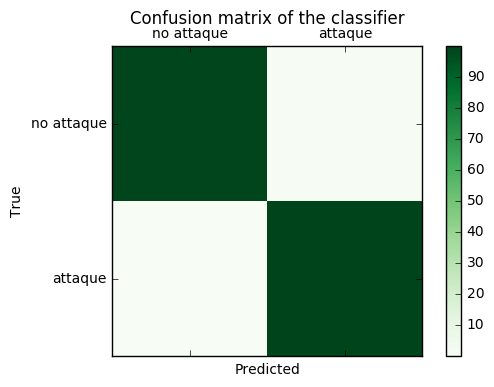

In [63]:
from sklearn.ensemble import RandomForestClassifier
# classifier
clf_rf = RandomForestClassifier(n_estimators= 170, max_depth=15, min_samples_split=2,
                                  min_samples_leaf=1)
# training
clf_rf = clf_rf.fit(X_train, y_train)
# classification
y_pred = clf_rf.predict(X_test)
# confusion matrix
do_metrics(y_test,y_pred)
labels = ['no attaque', 'attaque']
cm = metrics.confusion_matrix(y_test, y_pred)
plot_cm(cm, labels)

## multiclassification avec logs normaux et 3 types d'attaque

In [37]:
X_train4=pd.concat([X_train1,X_train2])
X_test4=pd.concat([X_test1,X_test2])
y_train4=pd.concat([y_train1,y_train2])
y_test4=pd.concat([y_test1,y_test2])

In [38]:
def plot_cm4(cm, labels):
    
    # Compute percentanges
    percent = (cm*100.0)/np.array(np.matrix(cm.sum(axis=1)).T)  # Derp, I'm sure there's a better way
    
    print ('Confusion Matrix Stats')
    for i, label_i in enumerate(labels):
        for j, label_j in enumerate(labels):
            print ("%s/%s: %.2f%% (%d/%d)" % (label_i, label_j, (percent[i][j]), cm[i][j], cm[i].sum()))

    # Show confusion matrix
    # Thanks kermit666 from stackoverflow :)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.grid(b=False)
    cax = ax.matshow(percent, cmap='Greens')
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [44]:
def do_metrics4(y_test,y_pred):
    print ("metrics.confusion_matrix:")
    print (metrics.confusion_matrix(y_test, y_pred))
    print ("metrics.accuracy_score:")
    print (metrics.accuracy_score(y_test, y_pred))

metrics.confusion_matrix:
[[  3585     28      0      0]
 [     9 117806      0      0]
 [     1      0     81      0]
 [     0      0      0    112]]
metrics.accuracy_score:
0.999687556528
Confusion Matrix Stats
no attaque/no attaque: 99.23% (3585/3613)
no attaque/brute force: 0.77% (28/3613)
no attaque/sql: 0.00% (0/3613)
no attaque/xss: 0.00% (0/3613)
brute force/no attaque: 0.01% (9/117815)
brute force/brute force: 99.99% (117806/117815)
brute force/sql: 0.00% (0/117815)
brute force/xss: 0.00% (0/117815)
sql/no attaque: 1.22% (1/82)
sql/brute force: 0.00% (0/82)
sql/sql: 98.78% (81/82)
sql/xss: 0.00% (0/82)
xss/no attaque: 0.00% (0/112)
xss/brute force: 0.00% (0/112)
xss/sql: 0.00% (0/112)
xss/xss: 100.00% (112/112)


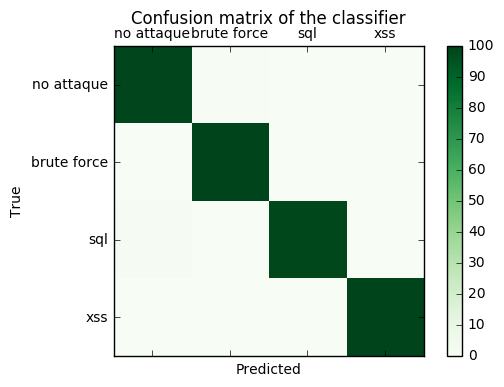

In [48]:
from sklearn.ensemble import RandomForestClassifier
# classifier
clf_rf4 = RandomForestClassifier(n_estimators= 170, max_depth=15, min_samples_split=2,
                                  min_samples_leaf=1)
# training
clf_rf4 = clf_rf4.fit(X_train4, y_train4)
# classification
y_pred4 = clf_rf4.predict(X_test4)
# confusion matrix
do_metrics4(y_test4,y_pred4)
labels = ['no attaque', 'brute force', 'sql','xss']
cm = metrics.confusion_matrix(y_test4, y_pred4)
plot_cm4(cm, labels)